In [5]:
# inspired by: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, classification_report, confusion_matrix

n_samples = 300;
n_clusters = 3        # 2-5 
noise_level = 1.20    
random_state = 2


# Make and visualize Training data

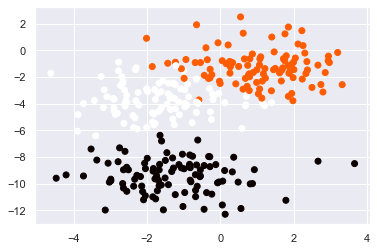

In [6]:

# Generate the training data and true classification.
X_train, y_train = make_blobs(n_samples=n_samples, 
                              centers=n_clusters, 
                              cluster_std=noise_level, 
                              random_state=random_state);

# Show the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='hot')


# Fit the Model

[0 1 2]


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

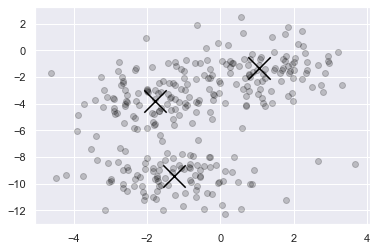

In [16]:

kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
kmeans.fit(X_train);
centers = kmeans.cluster_centers_;

plt.scatter(X_train[:, 0], X_train[:, 1], c="black", alpha=.2)
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=500, marker="x")


# Correction for random cluster number
labels = [np.unique(y_train).sort()];
print(np.unique(y_train))
lot = []
for l in labels:
    group = X_train[y_train == l];
    group_center = np.mean(group, axis=0)
    closest, _ = pairwise_distances_argmin_min([group_center], centers)
    lot.append(closest[0])
    
    


print(lot)


### Find the Clusters

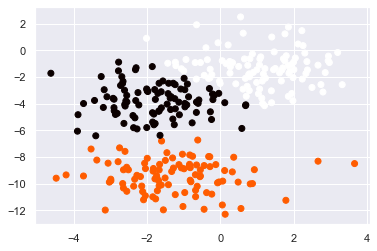

In [17]:

y_predict_train_temp = kmeans.predict(np.append(centers, X_train, axis=0))
y_predict_train = [y_predict_train_temp[l] for l in y_predict_train_temp[n_clusters:]]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_predict_train, cmap='hot');


### Quantify the Performance

In [11]:

print(classification_report(y_train, y_predict_train))


              precision    recall  f1-score   support

           0       0.01      0.01      0.01       100
           1       0.00      0.00      0.00       100
           2       0.07      0.07      0.07       100

    accuracy                           0.03       300
   macro avg       0.03      0.03      0.03       300
weighted avg       0.03      0.03      0.03       300



# Lets try it out on new data

In [18]:

# Generate the new data to see how well the model performs.
X_test, y_test_temp = make_blobs(n_samples=n_samples, 
                                  centers=centers, 
                                  cluster_std=noise_level, 
                                  random_state=random_state + 1);

y_test = [center_values[i] for i in y_test_temp]

plt.scatter(X_test[:, 0], X_test[:, 1], c="black");



NameError: name 'center_values' is not defined

[[-1.27212042 -9.44907874]
 [ 1.03594087 -1.35101773]
 [-1.79523713 -3.80306053]]


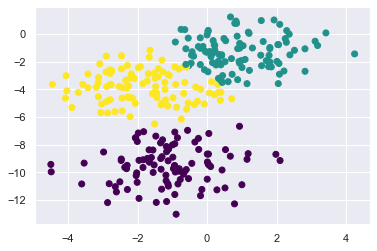

In [20]:

y_predict_test = kmeans.predict(X_test);
print(kmeans.cluster_centers_)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predict_test, cmap='viridis');


# How well did it work?

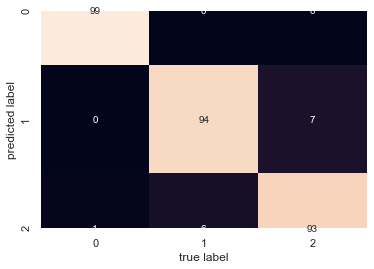

In [21]:

mat = confusion_matrix(y_test, y_predict_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label');
plt.ylabel('predicted label');


In [22]:

print(classification_report(y_predict_test, y_test))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       0.94      0.93      0.94       101
           2       0.93      0.93      0.93       100

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



### Visualize the misclassifications 

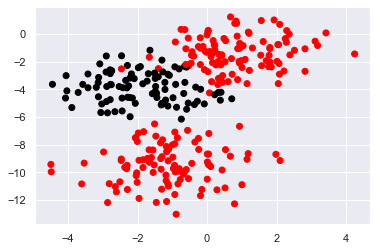

In [16]:

x = X_test[:, 0]
y = X_test[:, 1]

matches = [y_predict_test[i] == y_test[i] for i in range(len(x))]
colors = ['black' if match else 'red' for match in matches]

plt.scatter(x, y, c=colors);
    